In [174]:
import glob
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [175]:
MILLIS_TO_S = 1000
GTT = 20
S_TO_HR = 3600

In [176]:
# Change according to your path
files_path = r'C:\Users\corys\Documents\SmartIV\ProcessingScripts\DataLog\Initial for Filter Determination\10*'
flow_rate = str(20)

# Get list of file paths for each file in directory
file_path_list = sorted(glob.glob(files_path))
num_files = len(file_path_list)

# print(num_files)
# print(file_path_list)


In [177]:
# Create list of data per file for each test data file
data_list = []
time_list = []
for i in range(0, num_files):
    with open(file_path_list[i]) as f:
        lines = f.readlines()
        line_list = []
        counter = 0
        for line in lines:
            if (counter < 2):
                counter = counter + 1
                continue
                
            line.replace('\n', '')
            line = S_TO_HR / (GTT * (int(line) / MILLIS_TO_S))
            line_list.append(line)
        data_list.append(line_list)
        
        time_list.append([i for i in range(1, len(lines) + 1)])

In [178]:
def Plot_FlowRate(data_array, accuracy_bound = 0.99, trial_name='Trial 1'):
    
    plt.figure()
    
    time_array = range(1, len(data_array) + 1)
    # Find the value to interpolate at
    interp_value = accuracy_bound * max(data_array)

    # Find the index of the nearest value in the data array to the interpolation value
    index = np.abs(np.array(data_array) - interp_value).argmin()

    # Find the closest time series value to the index found above
    closest_time_point = time_array[index]

    print("The interpolated value at", interp_value, "is", closest_time_point)

    plt.plot(time_array, data_array)
    plt.title(f"Flow Rate Plot for {flow_rate} ml/hr : {trial_name}")
    plt.xlabel("Sample Point #")
    plt.ylabel("Computed Flow Rate (ml/hr)")
    plt.xticks(time_array)
    plt.ylim([0, 25])
    plt.axvline(x = closest_time_point, color = 'r', label="99% Accuracy Cutoff")
    plt.legend()
    plt.show()

The interpolated value at 11.820111435394004 is 10


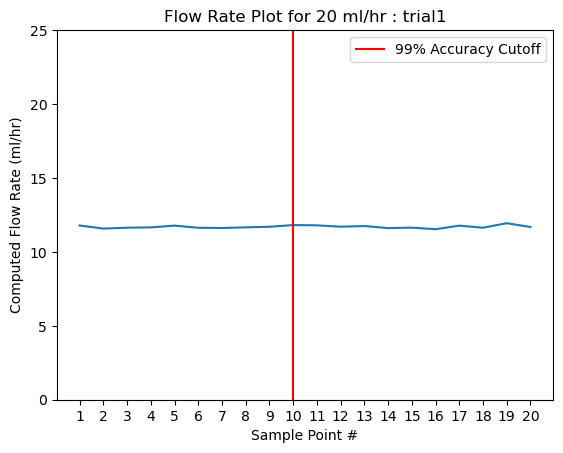

The interpolated value at 178200.0 is 21


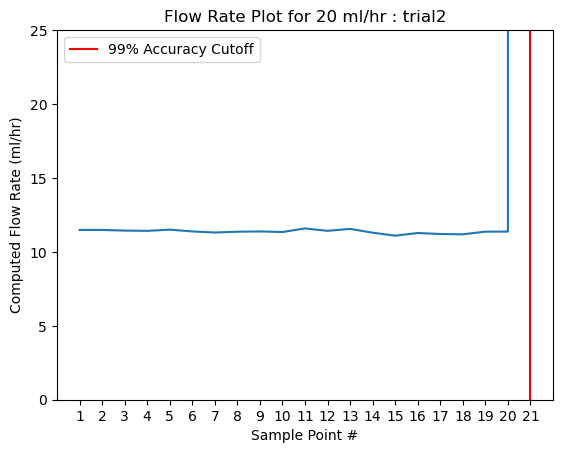

In [179]:
for i in range(num_files):
    Plot_FlowRate(data_list[i], trial_name=file_path_list[i][-6:])